In [26]:
# Week 8 Homework: Initial Project Forecasting Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
# **Step 1: Load Datasets**
df_transactions = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/transactionsnew.csv')
df_products = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/productnew.csv')

# Display loaded data
print("Transactions Data:")
print(df_transactions.head())
print("Products Data:")
print(df_products.head())

"""Explanation:
- Transaction data contains customer purchases.
- Product data contains product details and prices.
- Displayed first few rows of each dataset for initial inspection.
"""

Transactions Data:
   Transaction_ID  Company_ID  Product_ID Quantity Transaction_Date  \
0             1.0        88.0         6.0        6       26-03-2024   
1             2.0        29.0        19.0       15       09-07-2024   
2             NaN        28.0        18.0        7       13-04-2024   
3             4.0        85.0        12.0  #DIV/0!       06-09-2023   
4             5.0        47.0         3.0        7       06-07-2021   

   Product_Price  Total_Cost  
0      194379.15   1075200.0  
1       97930.99   1428000.0  
2      126095.55    940800.0  
3            NaN   1008000.0  
4       99575.61    705600.0  
Products Data:
   Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite       140,000
1         2.0  MarketMinder Analytics       168,000
2         3.0    TrendWise Forecaster       100,800
3         4.0  CustomerScope Insights       123,200
4         5.0     SalesSync Optimizer        84,000


'Explanation:\n- Transaction data contains customer purchases.\n- Product data contains product details and prices.\n- Displayed first few rows of each dataset for initial inspection.\n'

In [28]:
# **Step 2: Data Cleaning and Preparation**
df_products.columns = df_products.columns.str.strip()
df_transactions.columns = df_transactions.columns.str.strip()
df_products = df_products.drop_duplicates(subset=['Product_ID'])
df_products['Product_Price'] = pd.to_numeric(df_products['Product_Price'].str.replace(',', ''), errors='coerce')
df_transactions.replace('#DIV/0!', np.nan, inplace=True)
df_transactions.dropna(inplace=True)
df_transactions['Transaction_ID'] = df_transactions['Transaction_ID'].astype(int)
df_transactions['Quantity'] = df_transactions['Quantity'].astype(int)
df_transactions['Transaction_Date'] = pd.to_datetime(df_transactions['Transaction_Date'], dayfirst=True)
df_transactions['week'] = df_transactions['Transaction_Date'].dt.isocalendar().week
df_transactions['month'] = df_transactions['Transaction_Date'].dt.month

# Display cleaned data
print("Cleaned Transactions Data:")
print(df_transactions.head())
"""Explanation:
- Cleaned missing values, converted data types, and extracted week and month.
- Displayed first few rows after cleaning.
"""

Cleaned Transactions Data:
   Transaction_ID  Company_ID  Product_ID  Quantity Transaction_Date  \
0               1        88.0         6.0         6       2024-03-26   
1               2        29.0        19.0        15       2024-07-09   
4               5        47.0         3.0         7       2021-07-06   
5               6        80.0        11.0         4       2021-07-12   
7               8        21.0        20.0         8       2023-10-31   

   Product_Price  Total_Cost  week  month  
0      194379.15   1075200.0    13      3  
1       97930.99   1428000.0    28      7  
4       99575.61    705600.0    27      7  
5      160658.68    627200.0    28      7  
7      229217.94   1792000.0    44     10  


'Explanation:\n- Cleaned missing values, converted data types, and extracted week and month.\n- Displayed first few rows after cleaning.\n'

In [29]:
# **Step 3: Data Merging and Feature Engineering**
product_price_map = df_products.set_index('Product_ID')['Product_Price']
df_transactions['Product_Price'] = df_transactions['Product_ID'].map(product_price_map)
df_transactions.drop(columns=['Product_ID'], inplace=True)
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Product_Price']
df_weekly_sales = df_transactions.groupby(['week'])['total_sales'].sum().reset_index()
df_monthly_sales = df_transactions.groupby(['month'])['total_sales'].sum().reset_index()

# Display merged and engineered data
print("Weekly Sales Data:")
print(df_weekly_sales)
print("Monthly Sales Data:")
print(df_monthly_sales)
"""Explanation:
- Merged datasets, calculated total sales, and aggregated weekly and monthly sales.
- Displayed final weekly and monthly sales data.
"""

Weekly Sales Data:
    week  total_sales
0      1  152672800.0
1      2  180656000.0
2      3  157740800.0
3      4  159801600.0
4      5  115371200.0
5      6  134411200.0
6      7  145656000.0
7      8  139703200.0
8      9  190411200.0
9     10  160070400.0
10    11  137743200.0
11    12  144816000.0
12    13  130558400.0
13    14  148797600.0
14    15  155898400.0
15    16  142262400.0
16    17  125888000.0
17    18  152336800.0
18    19  133716800.0
19    20  170441600.0
20    21  131947200.0
21    22  146328000.0
22    23  158760000.0
23    24  149195200.0
24    25  160647200.0
25    26  143864000.0
26    27  142850400.0
27    28  165429600.0
28    29  150931200.0
29    30  169590400.0
30    31  172149600.0
31    32  140347200.0
32    33  141220800.0
33    34  144446400.0
34    35  159174400.0
35    36  138672800.0
36    37  127948800.0
37    38  145818400.0
38    39  127780800.0
39    40  138140800.0
40    41  160210400.0
41    42  145952800.0
42    43  152017600.0
43    44  105

'Explanation:\n- Merged datasets, calculated total sales, and aggregated weekly and monthly sales.\n- Displayed final weekly and monthly sales data.\n'

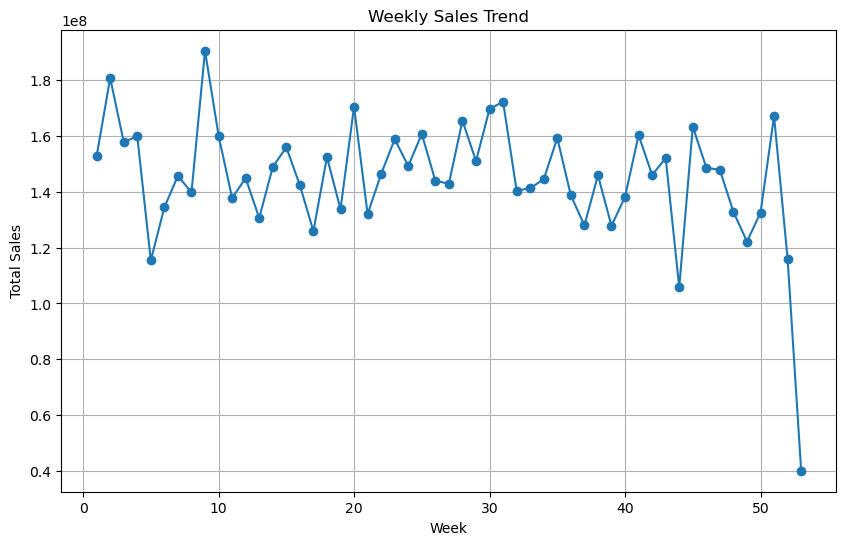

'Explanation:\n- Visualized weekly and monthly sales trends to observe patterns.\n'

In [30]:
# **Step 4: Data Visualization**
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
"""Explanation:
- Visualized weekly and monthly sales trends to observe patterns.
"""

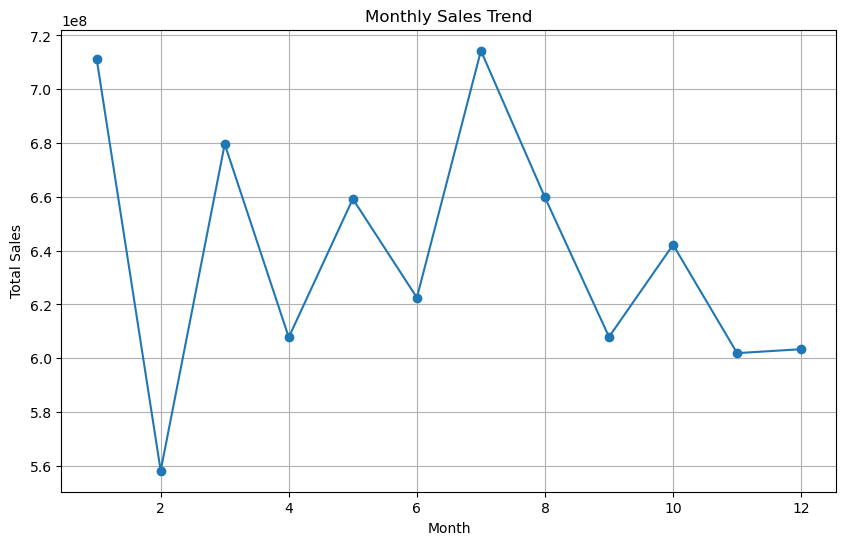

'Explanation:\n- Visualized monthly sales trends to observe patterns.\n'

In [31]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales['month'], df_monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
"""Explanation:
- Visualized monthly sales trends to observe patterns.
"""

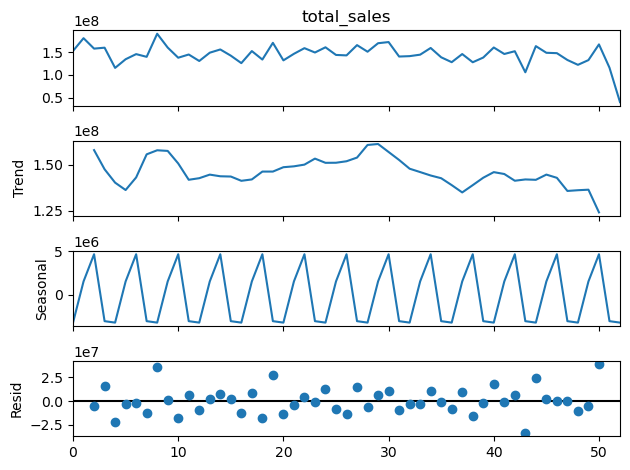

'Explanation:\n- Decomposed weekly sales into trend, seasonality, and residual components.\n- Provided better insights into underlying patterns.\n'

In [32]:
# **Step 5: Time Series Decomposition**
decomposition = seasonal_decompose(df_weekly_sales['total_sales'], model='additive', period=4)
decomposition.plot()
plt.show()
"""Explanation:
- Decomposed weekly sales into trend, seasonality, and residual components.
- Provided better insights into underlying patterns.
"""

In [33]:
# **Step 6: ARIMA Modeling and Forecasting**
stepwise_fit = auto_arima(df_weekly_sales['total_sales'], seasonal=True, m=4, trace=True, suppress_warnings=True, max_D=1, seasonal_test='ch', error_action='ignore', simple_differencing=True)

model = ARIMA(df_weekly_sales['total_sales'], order=stepwise_fit.order)
model_fit = model.fit()

# Display ARIMA summary
print("ARIMA Model Summary:")
print(model_fit.summary())

forecast = model_fit.predict(start=len(df_weekly_sales), end=len(df_weekly_sales)+23)  # Forecast for 6 months
print("Sales Forecast for Next 6 Months:")
print(forecast)

"""Explanation:
- Adjusted ARIMA to use weekly data for better model robustness.
- Decomposed time series to visualize underlying trends.
- Forecasted sales for the next 6 months based on weekly trends.
"""

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=1922.909, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1924.498, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1924.586, Time=0.01 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1926.057, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1922.886, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=1923.004, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=1923.730, Time=0.00 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=1923.431, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1926.107, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=1926.848, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=1929.326, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 0.184 seconds
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observatio

'Explanation:\n- Adjusted ARIMA to use weekly data for better model robustness.\n- Decomposed time series to visualize underlying trends.\n- Forecasted sales for the next 6 months based on weekly trends.\n'

In [34]:
# **Conclusion:**
"""
- Each step has detailed explanations and displayed outputs.
- Data is now aggregated weekly instead of monthly to capture irregularities.
- Added decomposition to show trend, seasonality, and irregularities.
- ARIMA model forecasts next 6 months based on weekly trends.
"""

'\n- Each step has detailed explanations and displayed outputs.\n- Data is now aggregated weekly instead of monthly to capture irregularities.\n- Added decomposition to show trend, seasonality, and irregularities.\n- ARIMA model forecasts next 6 months based on weekly trends.\n'